# Kevin's Code

### Imports

In [1]:
import pandas as pd
import plotly.express as px

### Import data

In [2]:
digits = pd.read_csv('train.csv')
test_digits = pd.read_csv('test.csv')

# split 'digits' into training and validation sets
train_digits = digits.sample(frac=0.8, random_state=0)
valid_digits = digits.drop(train_digits.index)

### TensorFlow neural network model

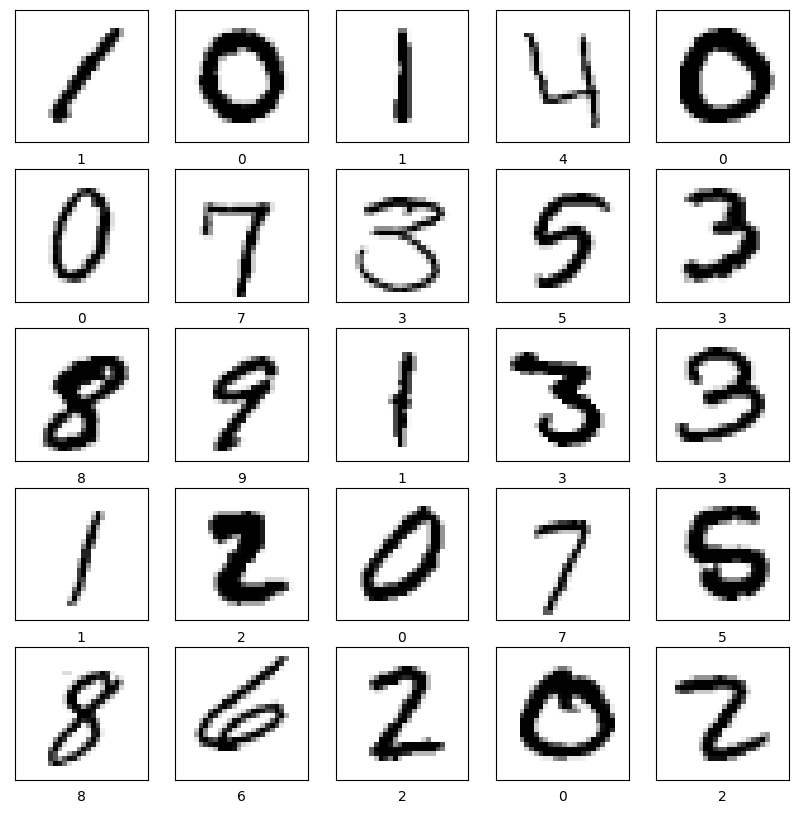

Epoch 1/10
   1/1050 [..............................] - ETA: 2:50 - loss: 2.3056 - accuracy: 0.0625

2023-05-10 09:42:00.595213: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1050/1050 [==============================] - 9s 8ms/step - loss: 0.1984 - accuracy: 0.9393 - val_loss: 0.0868 - val_accuracy: 0.9721
Epoch 2/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0579 - accuracy: 0.9810 - val_loss: 0.0764 - val_accuracy: 0.9771
Epoch 3/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0429 - accuracy: 0.9864 - val_loss: 0.0433 - val_accuracy: 0.9869
Epoch 4/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0569 - val_accuracy: 0.9827
Epoch 5/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0447 - val_accuracy: 0.9885
Epoch 6/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0223 - accuracy: 0.9922 - val_loss: 0.0496 - val_accuracy: 0.9861
Epoch 7/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0563 - val_accuracy: 0.9877
E

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.python.keras import layers, models
import matplotlib.pyplot as plt

digits = pd.read_csv("train.csv")
digits_features = digits.copy()
digits_labels = digits_features.pop('label')

digits_features = np.array(digits_features)
digits_features = digits_features / 255.0

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(digits_features[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[digits_labels[i]])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(digits_features.reshape(42000, 28, 28, 1), digits_labels, epochs=10, validation_split=0.2)

### Evaluating the model

263/263 - 1s - loss: 9.5945 - accuracy: 0.9902
Neural Network Accuracy: 0.9902380704879761%


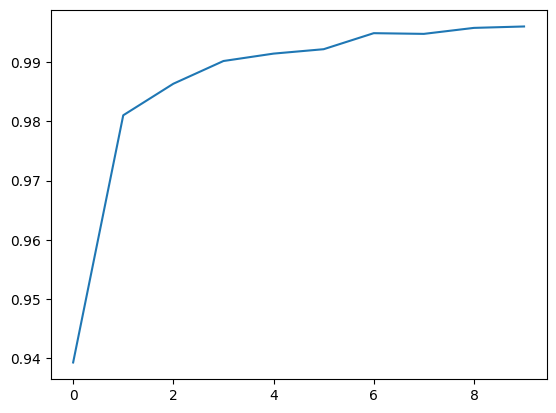

In [4]:
# evaluate the NN model
plt.plot(history.history['accuracy'], label='accuracy')

valid_features = valid_digits.copy()
valid_labels = valid_features.pop('label')

valid_features = np.array(valid_features)

test_loss, test_acc = model.evaluate(valid_features.reshape(valid_features.shape[0], 28, 28, 1), valid_labels, verbose=2)

print("Neural Network Accuracy: " + str(test_acc) + "%")

### Making predictions

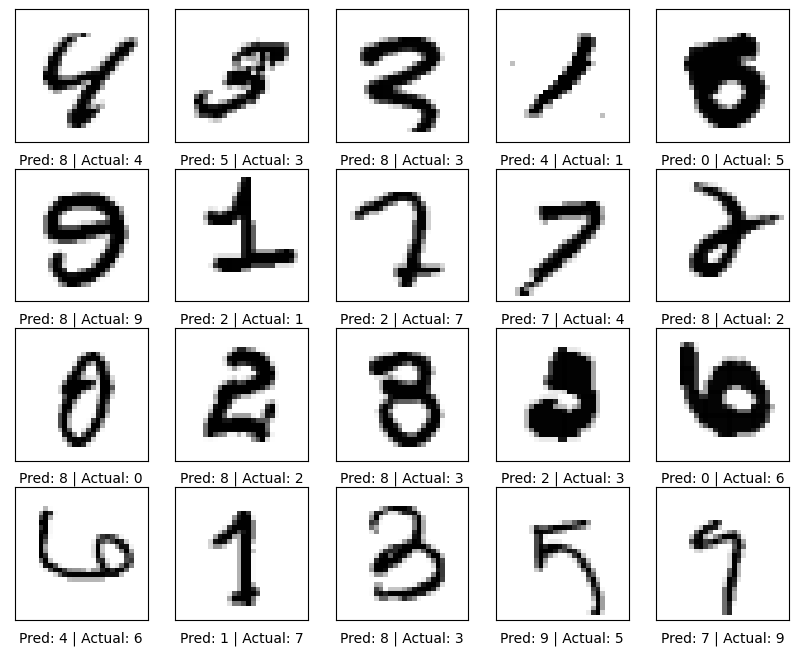

In [5]:
# make predictions
predictions = model.predict(valid_features.reshape(valid_features.shape[0], 28, 28, 1))

pred_labels = np.argmax(predictions, axis=1)

valid_labels = np.array(valid_labels)
pred_labels = np.array(pred_labels)      

# plot misclassified images
num_incorrect = 0
misclassified = []
labels = []
valid = []

for i in range(0, len(pred_labels), 3):
    if valid_labels[i] != pred_labels[i]:
        misclassified.append(valid_features[i])
        labels.append(pred_labels[i])
        valid.append(valid_labels[i])
        num_incorrect += 1
        if len(misclassified) >= 20:
            break
   
plt.figure(figsize=(10,10))
for i in range(0, len(misclassified)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(misclassified[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel("Pred: " + str(class_names[labels[i]]) + " | Actual: " + str(class_names[valid[i]]))
plt.show()